<a href="https://colab.research.google.com/github/pvlKryu/BTC-USD_ML_Prediction/blob/main/BTC_USD_ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn



In [68]:
# Open input data file
bitcoin = pd.read_csv("/content/BTCUSD_daily.csv", index_col = 0)

In [69]:
bitcoin.describe()

,open,high,low,close,Volume USD,Volume BTC
count,2652.000000,2652.000000,2652.000000,2652.000000,2.652000e+03,2652.000000
mean,12817.097939,13186.267542,12399.817371,12828.207655,1.497664e+08,18381.609947
std,16824.413997,17289.418026,16283.433540,16826.150324,2.171489e+08,20526.790610
min,212.630000,223.200000,162.000000,212.630000,0.000000e+00,0.000000
25%,756.692500,773.582500,743.492500,766.082500,1.362017e+07,5678.644934
50%,6753.050000,6939.300000,6602.450000,6756.100000,6.404094e+07,10971.855000
75%,11473.000000,11791.500000,11124.500000,11478.250000,2.004097e+08,23124.732500
max,67526.000000,68958.000000,66326.000000,67526.000000,2.491339e+09,266768.610000


In [70]:
# Convert to datetime
bitcoin.date = pd.to_datetime(bitcoin.date)

<function matplotlib.pyplot.show>

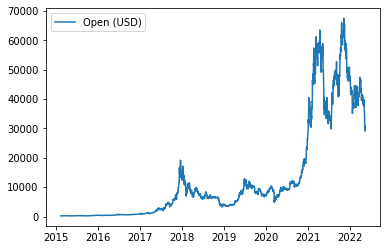

In [71]:
# Making a open price/year plot
plt.plot(bitcoin.date, bitcoin.open, label = "Open (USD)" )
plt.legend()
plt.show

In [72]:
# Let's make some simple Feature Engineering

bitcoin["openclose"] = bitcoin.open - bitcoin.close 
bitcoin["highlow"] = bitcoin.high - bitcoin.low  
bitcoin["open_high"] = bitcoin["openclose"] / bitcoin["highlow"]

bitcoin["month"] = bitcoin.date.dt.month
bitcoin["year"] = bitcoin.date.dt.year
bitcoin["weekday"] = bitcoin.date.dt.weekday

In [73]:
# Add some sliding windows

bitcoin["open_mean_7d"] = bitcoin["open"].shift(1).rolling(window=7).mean()
bitcoin["max_volume_btc_30d"] = bitcoin["Volume BTC"].shift(1).rolling(window=30).max()
bitcoin["min_close_14d"] = bitcoin["close"].shift(1).rolling(window=14).min()

In [74]:
# Data preparation

# Expanding categorical columns
bitcoin = pd.get_dummies(bitcoin, columns=["year", "month", "weekday"])

# Remove extra columns
bitcoin.drop("date", axis=1, inplace=True)
bitcoin.drop("symbol", axis=1, inplace=True) # Useless 

# Fill NA
bitcoin.fillna(method="backfill", inplace=True)

In [75]:
# Making predictions 

bitcoin["target"] = bitcoin["close"].shift(-1) #one day back

X = bitcoin[:-1].drop("target", axis=1)
y = bitcoin[:-1].target

In [76]:
# Split dfs
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

linreg = LinearRegression()
model = linreg
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))


train_score =  0.9978425597203103
test_score =  0.9971981383923962
max_error =  5938.990065100814
mean_absolute_error =  426.7124986833757
mean_squared_error =  749455.2231466173


In [80]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)  
test_score = model.score(X_test, y_test) 
y_pred = model.predict(X_test)

print("train_score = ", train_score)
print("test_score = ", test_score)
print("max_error = ", max_error(y_pred, y_test))
print("mean_absolute_error = ", mean_absolute_error(y_pred, y_test))
print("mean_squared_error = ", mean_squared_error(y_pred, y_test))

train_score =  0.9996360429211579
test_score =  0.9965453719325001
max_error =  8101.142337396785
mean_absolute_error =  434.2749199698736
mean_squared_error =  924060.2898409934


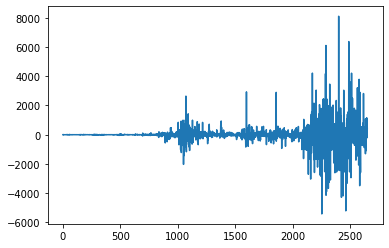

In [81]:
plt.plot(model.predict(X) - y)
# Std models work bad